In [1]:
import pandas as pd
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

### Read Data

In [2]:
data= pd.read_json('C:/Users/maede/Documents/Others/Maede/NLP/AMAZON_FASHION.json', lines=True)

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data=data.iloc[0:10000]
count_row = data.shape[0]  # number of row count
count_row

10000

In [5]:
count_col = data.shape[1]  # number of col count
count_col

12

In [6]:
data = data.drop(["vote", "style", "image"], axis=1)

In [7]:
data.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800
3,2,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400
4,3,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200


In [8]:
create_sentiment = {"overall": {1: "negative", 2: "negative", 3: "neutral", 4: "positive", 5: "positive"}}
data.replace(create_sentiment, inplace=True)

In [9]:
data.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
0,positive,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200
1,negative,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400
2,positive,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800
3,negative,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400
4,neutral,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200


### A pie chart of the target values

In [10]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 7
plot_size[1] = 5.5
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


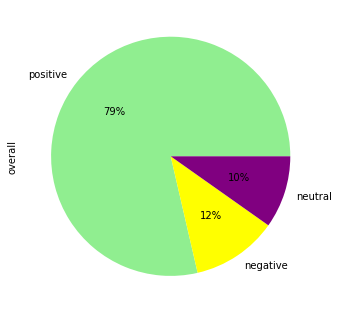

In [11]:
data.overall.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["lightgreen", "yellow", "purple"])

In [12]:
predictors = data.iloc[:, 6].values
target = data.iloc[:, 0].values
print("---predictors=\n", predictors)
print("---target=\n", target)

---predictors=
 ['Exactly what I needed.'
 "I agree with the other review, the opening is too small.  I almost bent the hook on some very expensive earrings trying to get these up higher than just the end so they're not seen.  Would not buy again but for the price, not sending back."
 "Love these... I am going to order another pack to keep in work; someone (including myself) is always losing the back to an earring.  I don't understand why all fish hook earrings don't have them.  Just wish that they were a tiny bit longer.  :)"
 ...
 "I typically wear a size 8-9 (W) depending on the style/brand. I have several pairs of Converse (low-tops) and I get a size 7.5 (M) that fit perfectly. I figured that these would be relatively similar because they are kind of the same style - I was actually worried that they might be a little snug. Boy was I wrong, THESE ARE HUGE.\n\nI wish I could wear them, but my feet just slide around inside. I can't return them because I don't live in the US and paying

###  Regular Expressions

In [13]:
predictor_reg_express = []

for sentence in range(0, len(predictors)):
    predictor_regular = re.sub(r'\W', ' ', str(predictors[sentence])) # Remove all the special characters

    predictor_regular= re.sub(r'\s+[a-zA-Z]\s+', ' ', predictor_regular)  # Remove all single characters

    predictor_regular = re.sub(r'\^[a-zA-Z]\s+', ' ', predictor_regular) # Remove single characters from the start

    predictor_regular = re.sub(r'\s+', ' ', predictor_regular, flags=re.I) # Substitute spaces with single space
    
    predictor_regular = re.sub(r'^b\s+', '', predictor_regular) # Remove prefixed 'b'

    predictor_regular = predictor_regular.lower() # Convert to Lowercase

    predictor_reg_express.append(predictor_regular)
    
    print(predictor_reg_express)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### TF-IDF: Term Frequency and Inverse Document Frequency

In [14]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
predictor_reg_express = vectorizer.fit_transform(predictor_reg_express).toarray()
predictor_reg_express

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Split data into training and test sets

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictor_reg_express, target, test_size=0.2, random_state=0)

### Random Forests Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [17]:
y_pred = text_classifier.predict(X_test)
y_pred

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("confusion_matrix=\n", confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy_score=", accuracy_score(y_test, y_pred))

confusion_matrix=
 [[ 102    0  114]
 [  14   44  157]
 [  14    3 1552]]
              precision    recall  f1-score   support

    negative       0.78      0.47      0.59       216
     neutral       0.94      0.20      0.34       215
    positive       0.85      0.99      0.92      1569

    accuracy                           0.85      2000
   macro avg       0.86      0.56      0.61      2000
weighted avg       0.85      0.85      0.82      2000

accuracy_score= 0.849


### Different Naive Bayes Algorithms

### Gaussian Naive Bayes 

In [22]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [23]:
#Create a Gaussian Classifier
GaussNB = GaussianNB()

In [24]:
#Train the model using the training sets
GaussNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
#Predict the response for test dataset
y_pred = GaussNB.predict(X_test)
y_pred

array(['negative', 'positive', 'positive', ..., 'positive', 'negative',
       'neutral'], dtype='<U8')

In [26]:
# Model Accuracy
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.3415


### Multinomial Naive Bayes

In [27]:
#Import multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

In [28]:
#Train the multinomial NB model
MultiNB=MultinomialNB()

In [29]:
#Create a multinomial NB Classifier
MultiNB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
#Predict the response for test dataset
y_pred = MultiNB.predict(X_test)
y_pred

array(['positive', 'positive', 'positive', ..., 'positive', 'negative',
       'positive'], dtype='<U8')

In [31]:
# multinomial NB Accuracy
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.7995


### Bernoulli Naive Bayes

In [32]:
#Import Bernoulli Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

In [33]:
#Train the Bernoulli NB model
BernNB=BernoulliNB()

In [34]:
#Create a Bernoulli NB Classifier
BernNB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [35]:
#Predict the response for test dataset
y_pred = BernNB.predict(X_test)
y_pred

array(['positive', 'positive', 'positive', ..., 'neutral', 'negative',
       'positive'], dtype='<U8')

In [36]:
# Bernoulli NB Accuracy
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.759
